#### Code Written by: **Daniel Cisneros**

Indivual Project: **Analyzing AI Salaries.** 

In [138]:
# Load libraries
library(tidyverse)
library(skimr)
library(ggplot2)
library(caret)
library(rpart)
library(rpart.plot)
library(lubridate)
library(gridExtra)
library(countrycode)
library(ggrepel)
library(ggeffects)

EDA

In [139]:
# Read data 
salaries <- read_csv("salaries.csv", show_col_types = FALSE)

salaries <- as.data.frame(salaries )

In [140]:
# Structure of the data. 
str(salaries)

'data.frame':	88584 obs. of  11 variables:
 $ work_year         : num  2025 2025 2025 2025 2025 ...
 $ experience_level  : chr  "MI" "SE" "SE" "SE" ...
 $ employment_type   : chr  "FT" "FT" "FT" "FT" ...
 $ job_title         : chr  "Customer Success Manager" "Engineer" "Engineer" "Applied Scientist" ...
 $ salary            : num  57000 165000 109000 294000 137600 ...
 $ salary_currency   : chr  "EUR" "USD" "USD" "USD" ...
 $ salary_in_usd     : num  60000 165000 109000 294000 137600 ...
 $ employee_residence: chr  "NL" "US" "US" "US" ...
 $ remote_ratio      : num  50 0 0 0 0 0 0 0 0 0 ...
 $ company_location  : chr  "NL" "US" "US" "US" ...
 $ company_size      : chr  "L" "M" "M" "M" ...


In [141]:
dim(salaries)

[1] 88584    11

In [142]:
head(salaries)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
2,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
3,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
4,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
5,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M
6,2025,EN,FT,Data Analyst,82000,USD,82000,US,0,US,M


In [143]:
# Get unique values. 
print(unique(salaries$company_location))
print(unique(salaries$employee_residence))

 [1] "NL" "US" "GB" "LT" "CA" "ES" "DE" "LV" "BE" "FR" "SK" "PH" "IE" "AU" "BR"
[16] "IN" "PL" "PE" "AR" "AT" "CH" "NZ" "PT" "RS" "FI" "TW" "NO" "UA" "SV" "EC"
[31] "CL" "DO" "MX" "CO" "MT" "DK" "ID" "MY" "XK" "CR" "JP" "ZM" "PR" "AM" "SG"
[46] "LU" "IT" "CY" "CD" "IL" "CZ" "KR" "ZA" "EG" "LB" "GR" "NG" "BG" "HU" "HR"
[61] "KE" "SE" "TR" "PK" "HN" "RO" "VE" "DZ" "AS" "AE" "SA" "OM" "BA" "EE" "VN"
[76] "GI" "SI" "MU" "RU" "QA" "GH" "AD" "HK" "CF" "TH" "IR" "BS" "IQ" "CN" "MD"
 [1] "NL" "US" "GB" "LT" "CA" "ES" "DE" "LV" "BE" "FR" "SK" "PH" "IE" "AU" "BR"
[16] "IN" "PL" "PE" "AR" "AT" "CH" "NZ" "PT" "RS" "FI" "TW" "NO" "SV" "EC" "CL"
[31] "DO" "MX" "CO" "SG" "MT" "DK" "ID" "MY" "XK" "CR" "JP" "ZM" "PR" "AM" "LU"
[46] "IT" "CY" "RW" "IL" "CZ" "KR" "ZA" "EG" "LB" "GR" "NG" "BG" "HU" "HR" "KE"
[61] "SE" "UA" "TR" "PK" "HN" "RO" "VE" "BM" "VN" "GE" "AE" "SA" "OM" "BA" "EE"
[76] "UG" "SI" "MU" "TH" "QA" "RU" "TN" "GH" "AD" "MD" "UZ" "HK" "CF" "KW" "IR"
[91] "AS" "CN" "BO" "DZ" "IQ" "JE"


In [144]:
unique(salaries$experience_level)
unique(salaries$remote_ratio)
unique(salaries$company_size)

[1] "MI" "SE" "EN" "EX"

[1]  50   0 100

[1] "L" "M" "S"

In [145]:
# Droping code where country (ISO code) is not equal to XK Kosovo since is not recognize. 
salaries <- salaries %>%
  filter(employee_residence != "XK" & company_location != "XK") 

In [146]:
# Get unique values. 
print(unique(salaries$company_location))
print(unique(salaries$employee_residence))

 [1] "NL" "US" "GB" "LT" "CA" "ES" "DE" "LV" "BE" "FR" "SK" "PH" "IE" "AU" "BR"
[16] "IN" "PL" "PE" "AR" "AT" "CH" "NZ" "PT" "RS" "FI" "TW" "NO" "UA" "SV" "EC"
[31] "CL" "DO" "MX" "CO" "MT" "DK" "ID" "MY" "CR" "JP" "ZM" "PR" "AM" "SG" "LU"
[46] "IT" "CY" "CD" "IL" "CZ" "KR" "ZA" "EG" "LB" "GR" "NG" "BG" "HU" "HR" "KE"
[61] "SE" "TR" "PK" "HN" "RO" "VE" "DZ" "AS" "AE" "SA" "OM" "BA" "EE" "VN" "GI"
[76] "SI" "MU" "RU" "QA" "GH" "AD" "HK" "CF" "TH" "IR" "BS" "IQ" "CN" "MD"
 [1] "NL" "US" "GB" "LT" "CA" "ES" "DE" "LV" "BE" "FR" "SK" "PH" "IE" "AU" "BR"
[16] "IN" "PL" "PE" "AR" "AT" "CH" "NZ" "PT" "RS" "FI" "TW" "NO" "SV" "EC" "CL"
[31] "DO" "MX" "CO" "SG" "MT" "DK" "ID" "MY" "CR" "JP" "ZM" "PR" "AM" "LU" "IT"
[46] "CY" "RW" "IL" "CZ" "KR" "ZA" "EG" "LB" "GR" "NG" "BG" "HU" "HR" "KE" "SE"
[61] "UA" "TR" "PK" "HN" "RO" "VE" "BM" "VN" "GE" "AE" "SA" "OM" "BA" "EE" "UG"
[76] "SI" "MU" "TH" "QA" "RU" "TN" "GH" "AD" "MD" "UZ" "HK" "CF" "KW" "IR" "AS"
[91] "CN" "BO" "DZ" "IQ" "JE"


In [147]:
# Search for empty entries.

print(sum(is.na(salaries$experience_level)))
print(sum(is.na(salaries$company_location)))
print(sum(is.na(salaries$employee_residence)))
print(sum(is.na(salaries$remote_ratio)))
print(sum(is.na(salaries$company_size)))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0


Prepare Data

In [148]:
# Preparing the data
salaries <- salaries %>%
  mutate(
    experience_level = factor(experience_level,
                             levels = c("EN", "MI", "SE", "EX"),
                             labels = c("Entry", "Mid", "Senior", "Executive")),
    remote_ratio = factor(remote_ratio,
                         levels = c(0, 50, 100),
                         labels = c("On-site", "Hybrid", "Fully Remote")),
    company_size = factor(company_size,
                         levels = c("S", "M", "L"),
                         labels = c("Small", "Medium", "Large")),
    work_year = factor(work_year)
  )

In [149]:
str(salaries)

'data.frame':	88582 obs. of  11 variables:
 $ work_year         : Factor w/ 6 levels "2020","2021",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ experience_level  : Factor w/ 4 levels "Entry","Mid",..: 2 3 3 3 3 1 1 3 3 3 ...
 $ employment_type   : chr  "FT" "FT" "FT" "FT" ...
 $ job_title         : chr  "Customer Success Manager" "Engineer" "Engineer" "Applied Scientist" ...
 $ salary            : num  57000 165000 109000 294000 137600 ...
 $ salary_currency   : chr  "EUR" "USD" "USD" "USD" ...
 $ salary_in_usd     : num  60000 165000 109000 294000 137600 ...
 $ employee_residence: chr  "NL" "US" "US" "US" ...
 $ remote_ratio      : Factor w/ 3 levels "On-site","Hybrid",..: 2 1 1 1 1 1 1 1 1 1 ...
 $ company_location  : chr  "NL" "US" "US" "US" ...
 $ company_size      : Factor w/ 3 levels "Small","Medium",..: 3 2 2 2 2 2 2 3 3 2 ...


In [150]:
# Summary statistics for usd 
summary(salaries$salary_in_usd)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15000  106100  146307  157570  198600  800000 

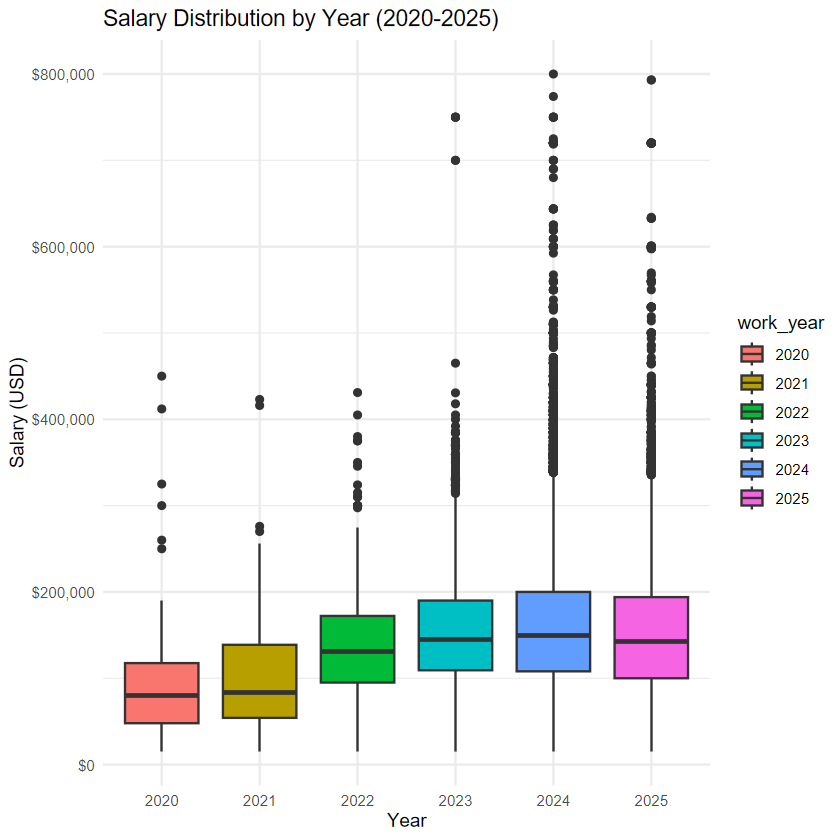

In [151]:
# Visualize salary distribution by year. 
ggplot(salaries, aes(x = work_year, y = salary_in_usd, fill = work_year)) +
  geom_boxplot() +
  labs(title = "Salary Distribution by Year (2020-2025)",
       x = "Year",
       y = "Salary (USD)") +
  scale_y_continuous(labels = scales::dollar) +
  theme_minimal()

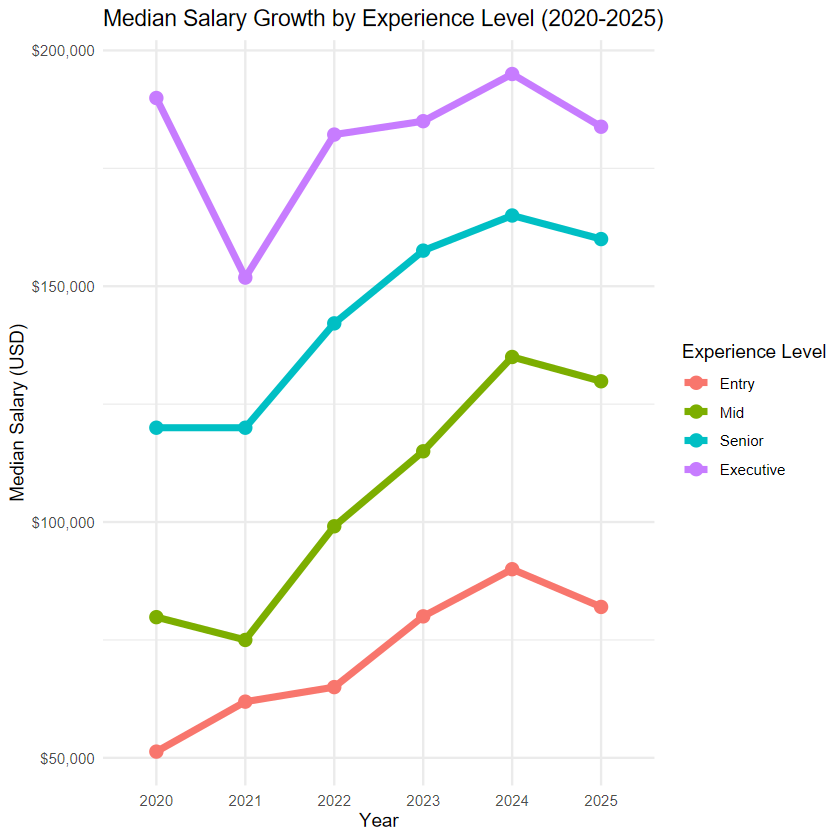

In [152]:
yearly_trends <- salaries %>%
  group_by(work_year, experience_level) %>% # Group data by Year and Expericene.
  summarise(median_salary = median(salary_in_usd), .groups = "drop") # Get the median salary per group

# Creating a graph connecting the median salry per experience level
ggplot(yearly_trends, aes(x = work_year, y = median_salary, 
                         group = experience_level, color = experience_level)) +
  geom_line(linewidth = 1.5) +
  geom_point(size = 3) +
  labs(title = "Median Salary Growth by Experience Level (2020-2025)",
       x = "Year",
       y = "Median Salary (USD)",
       color = "Experience Level") +  
  scale_y_continuous(labels = scales::dollar) +
  theme_minimal()

In [153]:
# Converting factors to numeric for modeling
salaries_model <- salaries %>%
  mutate(
    experience_num = as.numeric(experience_level),
    remote_num = as.numeric(remote_ratio),
    company_num = as.numeric(company_size)
  )

# Building linear model
lm_model <- lm(salary_in_usd ~ experience_num + remote_num + company_num + work_year, 
               data = salaries_model)

summary(lm_model)


Call:
lm(formula = salary_in_usd ~ experience_num + remote_num + company_num + 
    work_year, data = salaries_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-184417  -47631   -9917   35549  688099 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     27648.7     8531.4   3.241  0.00119 ** 
experience_num  34879.6      338.0 103.199  < 2e-16 ***
remote_num      -6895.9      289.4 -23.825  < 2e-16 ***
company_num      8202.9     1308.2   6.270 3.62e-10 ***
work_year2021   -8273.1     9268.9  -0.893  0.37210    
work_year2022   10849.2     8171.4   1.328  0.18428    
work_year2023   25713.5     8031.0   3.202  0.00137 ** 
work_year2024   37445.7     8001.8   4.680 2.88e-06 ***
work_year2025   32999.0     8015.8   4.117 3.85e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 69200 on 88573 degrees of freedom
Multiple R-squared:  0.1145,	Adjusted R-squared:  0.1144 
F-statistic:  1431 on 8 and

**Comments:** It seems that each experience level adds ~$34,000, larger companies pay more than small, and the year 2024 was one of the highest but taking in consideration that not all the data from 2025 is completed. Model seems statistical significant by F-statistics and p-value but it also suggest that other factors can play key. 

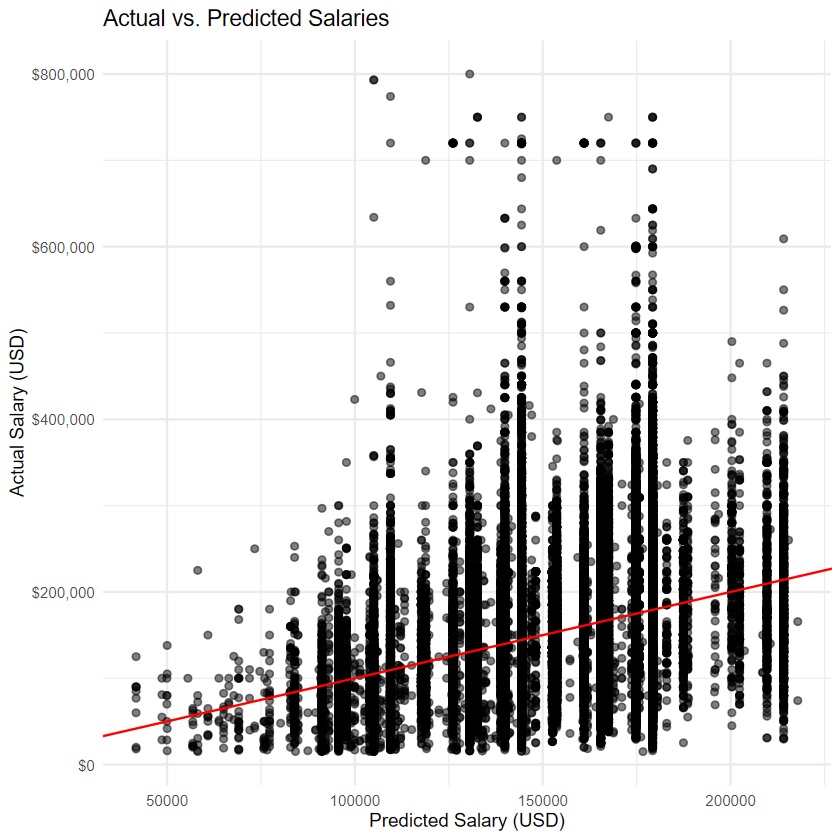

In [154]:
# Visualize predicted model
salaries_model$predicted <- predict(lm_model)

ggplot(salaries_model, aes(x = predicted, y = salary_in_usd)) +
  geom_point(alpha = 0.5) +
  geom_abline(intercept = 0, slope = 1, color = "red") +
  labs(title = "Actual vs. Predicted Salaries",
       x = "Predicted Salary (USD)", y = "Actual Salary (USD)") +
  scale_y_continuous(labels = scales::dollar) +
  theme_minimal()

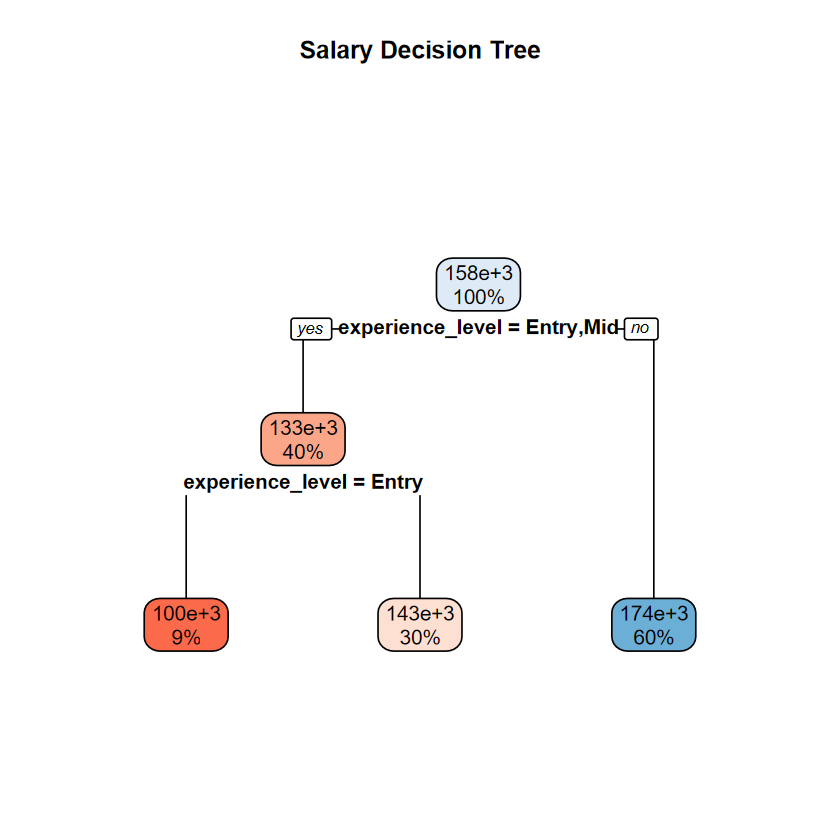

In [155]:
set.seed(123)
tree_model <- rpart(
  salary_in_usd ~ experience_level + remote_ratio + company_size + work_year,
  data = salaries_model,
  
)

# Visualize tree
rpart.plot(tree_model, 
           main = "Salary Decision Tree",
           box.palette="RdBu",
)

**Comments:** Salary decision tree suggest that more experience more earns which is expected. 

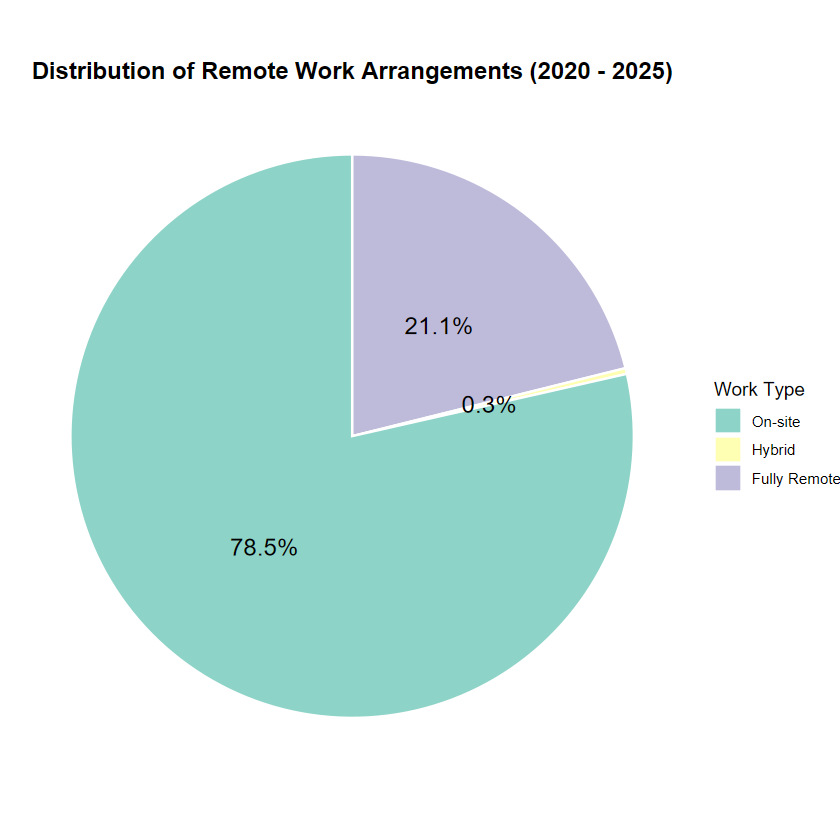

In [156]:
# Calculate percentages of work types
remote_percentages <- salaries %>%
  count(remote_ratio) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  arrange(desc(remote_ratio))  # Order pie chart

# Create pie chart
ggplot(remote_percentages, aes(x = "", y = percentage, fill = remote_ratio)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5),
            color = "black",
            size = 5) +
  scale_fill_brewer(palette = "Set3") +
  labs(title = "Distribution of Remote Work Arrangements (2020 - 2025)",
       fill = "Work Type") +
  theme_void() +
  theme(legend.position = "right",
        plot.title = element_text(hjust = 0.5, face = "bold", size = 14))

**Comments:** Pie chart shows that there are has been more on-site jobs overall but a grow in Fully Remote. 

In [157]:
# Looking at the interation from experience level and work type
interaction_model <- lm(salary_in_usd ~ experience_level * remote_ratio, 
                       data = salaries)

summary(interaction_model)


Call:
lm(formula = salary_in_usd ~ experience_level * remote_ratio, 
    data = salaries)

Residuals:
    Min      1Q  Median      3Q     Max 
-181570  -47272  -10256   35404  689864 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                        103271.8      828.7 124.613
experience_levelMid                                 43101.7      951.3  45.310
experience_levelSenior                              73484.7      899.7  81.679
experience_levelExecutive                           93298.0     1983.5  47.036
remote_ratioHybrid                                 -42716.0     7117.0  -6.002
remote_ratioFully Remote                           -15888.4     2091.3  -7.597
experience_levelMid:remote_ratioHybrid             -27882.1     9679.8  -2.880
experience_levelSenior:remote_ratioHybrid          -27394.8    10559.0  -2.594
experience_levelExecutive:remote_ratioHybrid        -6485.1    24225.3  -0.268
experience

**Comment:** It seems that remote jobs pay less in general but hybrid mode pays even less. Except for excutive having p significant value for fully remote. The trend of higher salary per experience keeps showing.

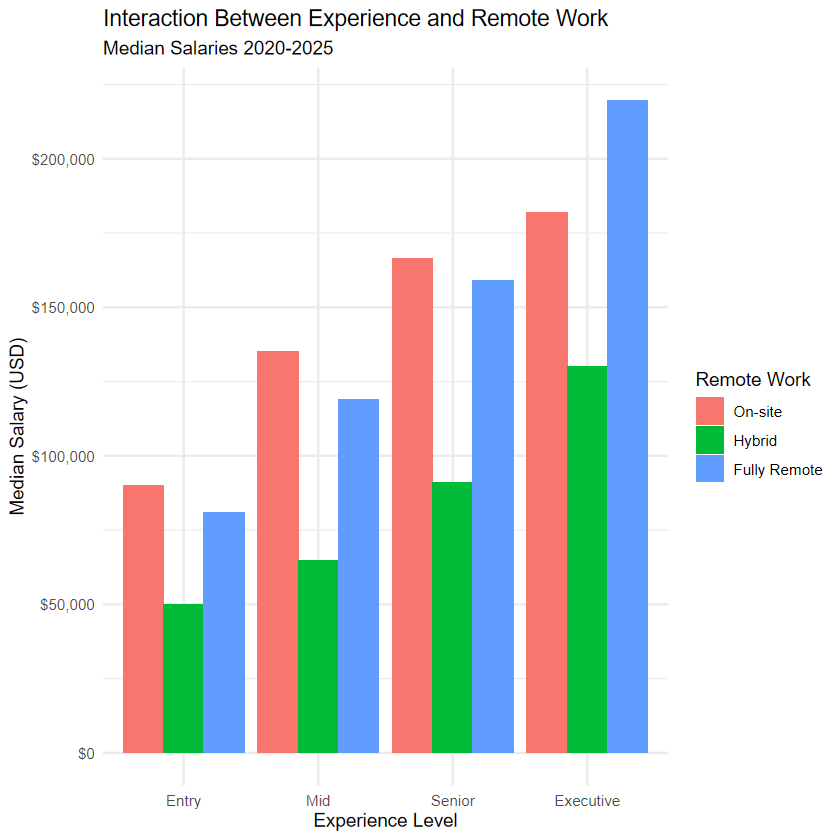

In [158]:
# Visualizing interactions 
salaries %>%
  group_by(experience_level, remote_ratio) %>%
  summarise(median_salary = median(salary_in_usd), .groups = "drop") %>%
  ggplot(aes(x = experience_level, y = median_salary, fill = remote_ratio)) +
  geom_col(position = "dodge") +
  labs(title = "Interaction Between Experience and Remote Work",
       subtitle = "Median Salaries 2020-2025",
       x = "Experience Level",
       y = "Median Salary (USD)",
       fill = "Remote Work") +
  scale_y_continuous(labels = scales::dollar) +
  theme_minimal()

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


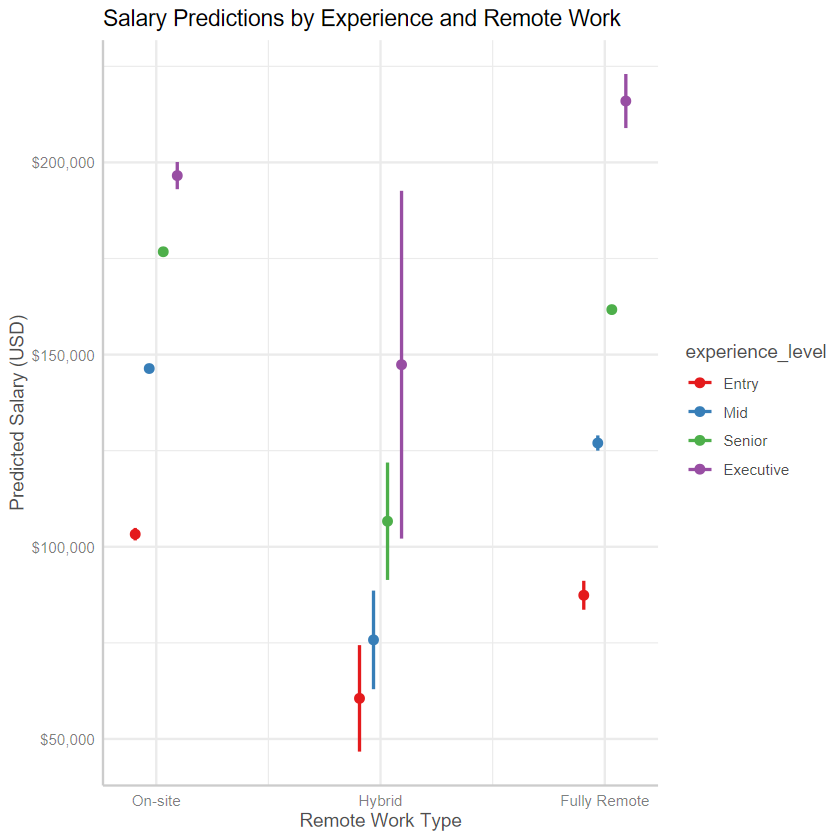

In [159]:
plot(ggpredict(interaction_model, terms = c("remote_ratio", "experience_level"))) +
  labs(title = "Salary Predictions by Experience and Remote Work",
       y = "Predicted Salary (USD)",
       x = "Remote Work Type") +
  scale_y_continuous(labels = scales::dollar)

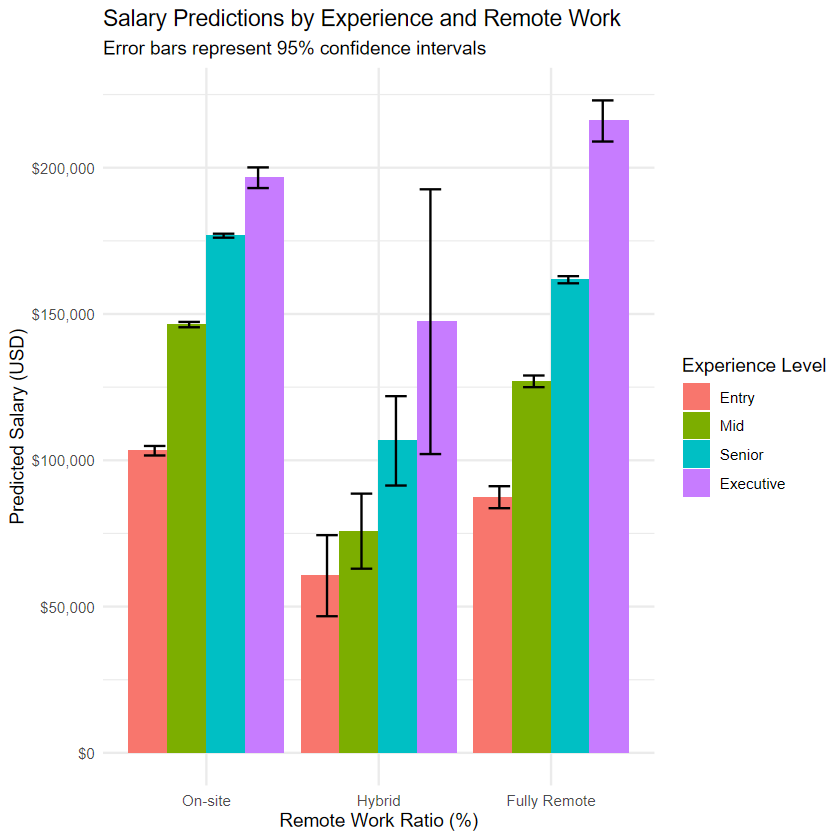

In [160]:
# Generate predictions from the interaction model
pred <- ggpredict(interaction_model, terms = c("remote_ratio", "experience_level"))

# Create a bar plot with CI
ggplot(pred, aes(x = factor(x), y = predicted, fill = group)) +
  geom_col(position = "dodge") +  # Bar plot
  geom_errorbar(
    aes(ymin = conf.low, ymax = conf.high),
    position = position_dodge(width = 0.8),
    width = 0.5,
    color = "black",
    linewidth = 0.5
  ) +
  labs(
    title = "Salary Predictions by Experience and Remote Work",
    subtitle = "Error bars represent 95% confidence intervals",
    y = "Predicted Salary (USD)",
    x = "Remote Work Ratio (%)",
    fill = "Experience Level"
  ) +
  scale_y_continuous(labels = scales::dollar) +
  theme_minimal() 
  

**Comments**: Viz shows that hybrid does have the lower scale pay for all type of experience especially for executive. Where executive also can ear more by doing fully remote. For entry to senior onsite jobs can make more money. 

Adding more interactions for better modeling and future reference. 

In [161]:
# Trying for better model and more interactions. 
better_model <- lm(
  salary_in_usd ~ experience_level * remote_ratio + company_size + work_year,
  data = salaries  # Using original factor variables
)
summary(better_model)


Call:
lm(formula = salary_in_usd ~ experience_level * remote_ratio + 
    company_size + work_year, data = salaries)

Residuals:
    Min      1Q  Median      3Q     Max 
-176673  -47701  -10048   35496  692929 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                         59427.4     8832.8   6.728
experience_levelMid                                 43152.8      949.1  45.469
experience_levelSenior                              74297.1      898.9  82.655
experience_levelExecutive                           94387.2     1979.5  47.682
remote_ratioHybrid                                 -27722.2     7252.5  -3.822
remote_ratioFully Remote                           -13130.8     2092.1  -6.276
company_sizeMedium                                  25431.5     4970.8   5.116
company_sizeLarge                                   33225.0     5058.1   6.569
work_year2021                                       -8124.3   

**Comments**: Company size has impact trend specially for large company which seems to pay more. still hybrid affects mid/senior workers and overall. 

`summarise()` has grouped output by 'x'. You can override using the `.groups`
argument.


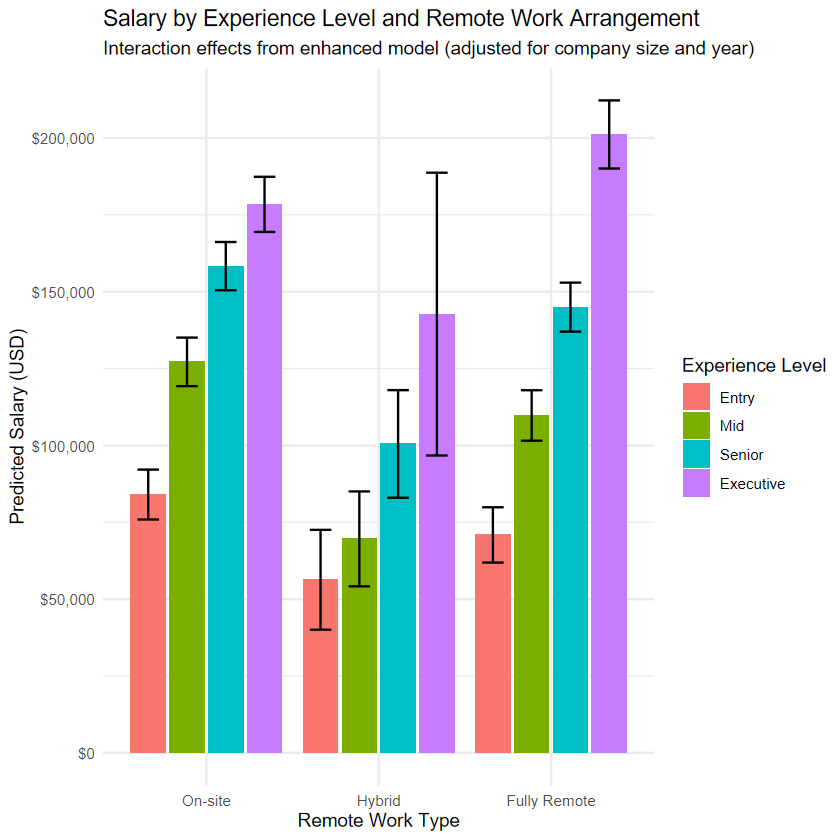

In [162]:
# Get predicted values with interactions
pred_data <- ggpredict(
  better_model, 
  terms = c("remote_ratio", "experience_level", "work_year", "company_size")
) 

# Simplifyng plotting (average across work_year and company_size)
plot_data <- pred_data %>% 
  as_tibble() %>%
  group_by(x, group) %>%  # x=remote_ratio, group=experience_level
  summarize(
    predicted = mean(predicted),
    conf.low = mean(conf.low),
    conf.high = mean(conf.high)
  )

# Create the interaction plot 
ggplot(plot_data, aes(x = x, y = predicted, fill = group)) +
  geom_col(position = position_dodge(0.9), width = 0.8) +
  geom_errorbar(
    aes(ymin = conf.low, ymax = conf.high),
    position = position_dodge(0.9),
    width = 0.5,
    color = "black",
    linewidth = 0.5
  ) +
  labs(
    title = "Salary by Experience Level and Remote Work Arrangement",
    subtitle = "Interaction effects from enhanced model (adjusted for company size and year)",
    y = "Predicted Salary (USD)",
    x = "Remote Work Type",
    fill = "Experience Level"
  ) +
  scale_y_continuous(labels = scales::dollar) +
  theme_minimal()


For future reference (Adding employee locations)

In [163]:
# # Adding a factor fot geographic  employee_residence
# geo_model <- lm(
#   salary_in_usd ~ experience_level * remote_ratio + company_size + work_year + employee_residence,
#   data = salaries
# )

# Top 10 highest-paying countries
salaries %>%
  group_by(employee_residence) %>%
  summarize(median_salary = median(salary_in_usd)) %>%
  arrange(desc(median_salary)) %>%
  head(10) %>%
  mutate(median_salary = scales::dollar(median_salary)) %>%
  print()



# A tibble: 10 × 2
   employee_residence median_salary
   <chr>              <chr>        
 1 QA                 $300,000     
 2 VE                 $192,500     
 3 US                 $151,700     
 4 SA                 $150,000     
 5 PR                 $145,200     
 6 CN                 $125,404     
 7 NZ                 $124,318     
 8 CH                 $123,819     
 9 LB                 $122,500     
10 CA                 $120,000     


**Comments:** The US is on the top 3 based on the top 10 highest paying countries based on the median employee residency.

In [164]:
# Simplify to continent-level analysis
salaries <- salaries %>%
  mutate(continent = countrycode(employee_residence, "iso2c", "continent"))

continent_model <- lm(
  salary_in_usd ~ experience_level * remote_ratio + company_size + work_year + continent,
  data = salaries
)
summary(continent_model) 


Call:
lm(formula = salary_in_usd ~ experience_level * remote_ratio + 
    company_size + work_year + continent, data = salaries)

Residuals:
    Min      1Q  Median      3Q     Max 
-178395  -45895  -10486   33112  749187 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                         40867.4    10223.4   3.997
experience_levelMid                                 39612.1      929.3  42.628
experience_levelSenior                              69021.2      882.5  78.210
experience_levelExecutive                           89698.2     1935.9  46.334
remote_ratioHybrid                                    256.2     7103.5   0.036
remote_ratioFully Remote                           -15491.8     2049.5  -7.559
company_sizeMedium                                   1640.3     4883.5   0.336
company_sizeLarge                                    8781.0     4966.6   1.768
work_year2021                                     

Even further analysis adding tittles job full time part time freelance and contractor. (Future reference)